In [4]:
#import of the stemming method from stemming.py file 
from stemming import stemming
#import of the lemmatizing method from lemmatization.py file 

from lemmatization import lemmatizing
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wojciechbasinski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package avera

In [5]:
#read the set of data from train.csv
df = pd.read_csv('data/train.csv')

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#call of the stemming method, providing approporiate dataframe column and file name
#processed file to be saved to an '/out' folder
stemming(df['text'],'steammed')

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3       13000 peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    ariaahrari thetawniest control wild fire calif...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Name: text, Length: 7613, dtype: object

In [16]:
#call of the stemming method, providing approporiate dataframe column and file name
#file is saved to an '/out' folder
tweets = lemmatizing(df['text'],'lemmatized').to_frame(name='text')

In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
dtypes: object(1)
memory usage: 59.6+ KB


## Vectorization process

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
bow_transformer = CountVectorizer().fit(tweets['text'])

In [23]:
print(len(bow_transformer.vocabulary_))

20337


In [47]:
tweet5 = tweets['text'][4]
print(tweet5)

get sent photo ruby alaska smoke wildfires pour school


In [48]:
bow5 = bow_transformer.transform([tweet5])
print(bow5)

  (0, 1053)	1
  (0, 6003)	1
  (0, 15263)	1
  (0, 15509)	1
  (0, 16599)	1
  (0, 16843)	1
  (0, 16987)	1
  (0, 17406)	1
  (0, 19801)	1


In [49]:
tweets_bow=bow_transformer.transform(tweets['text'])

In [50]:
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)

Shape of Sparse Matrix:  (7613, 20337)
Amount of Non-Zero occurences:  73633


## TD-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer


In [54]:
tfidf_transformer = TfidfTransformer().fit(tweets_bow)
tfidf4 = tfidf_transformer.transform(bow5)
print(tfidf4)

  (0, 19801)	0.4050225207852651
  (0, 17406)	0.2743105890492634
  (0, 16987)	0.3732614576495671
  (0, 16843)	0.26201832320121554
  (0, 16599)	0.4236015517026857
  (0, 15509)	0.3816157100201151
  (0, 15263)	0.26338623159639757
  (0, 6003)	0.1802553338076406
  (0, 1053)	0.35468242673214656


In [58]:
tweets_tfidf = tfidf_transformer.transform(tweets_bow)
print(tweets_tfidf.shape)

(7613, 20337)


In [59]:
import matplotlib.pylab as plt
%matplotlib inline

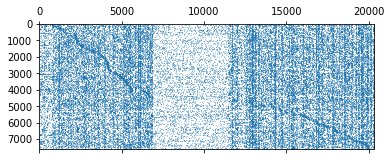

In [66]:
plt.spy(tweets_tfidf,markersize=0.1)

In [103]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, label_train, label_test = \
train_test_split(tweets_tfidf, df['target'], test_size=0.45,random_state=105)



In [104]:
from sklearn.naive_bayes import MultinomialNB
tweet_detect_model = MultinomialNB().fit(tweet_train, label_train)

In [105]:
all_predictions = tweet_detect_model.predict(tweet_test)
print(all_predictions)

[0 0 0 ... 0 1 1]


In [106]:
from sklearn.metrics import classification_report
print (classification_report(label_test, all_predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1940
           1       0.87      0.61      0.72      1486

    accuracy                           0.79      3426
   macro avg       0.81      0.77      0.78      3426
weighted avg       0.80      0.79      0.78      3426

